Total NER Time: 0.6310679611650486 seconds
Total CDT Time: 0.44660194174757284 seconds


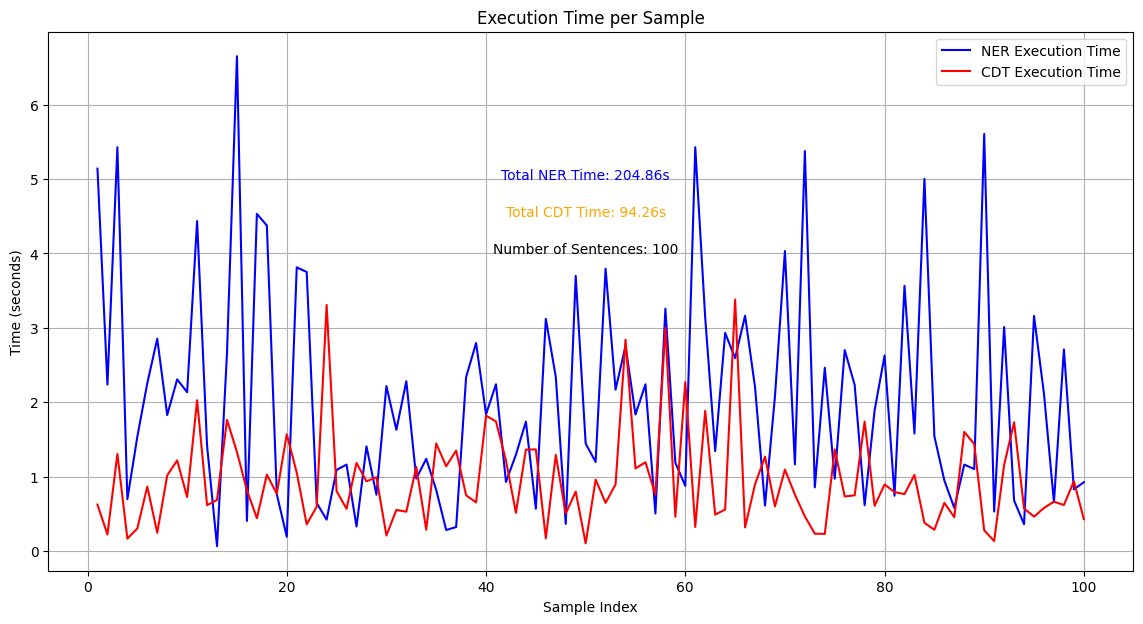

Total NER Precision: [2.9830245971679688, 3.2445108890533447, 0.00400233268737793, 2.944791555404663, 0.0030014514923095703, 2.897371530532837, 2.7200000286102295, 3.0049996376037598, 3.4170000553131104, 3.965059757232666, 3.5145156383514404, 3.8025810718536377, 4.243340730667114, 3.6816282272338867, 3.6205615997314453, 3.6565122604370117, 0.013999223709106445, 4.020000696182251, 0.014000415802001953, 3.965027332305908, 3.6865742206573486, 3.2480008602142334, 2.691999912261963, 2.802513599395752, 0.0040018558502197266, 2.7885146141052246, 2.744001626968384, 2.7539994716644287, 2.876513957977295, 3.3660013675689697, 3.0075676441192627, 3.043233633041382, 2.908001184463501, 2.9759879112243652, 2.8136980533599854, 2.577000856399536, 2.881028175354004, 2.6770358085632324, 2.6070432662963867, 0.024999380111694336, 2.9370009899139404, 3.0831282138824463, 3.425492525100708, 2.9554150104522705, 3.0126969814300537, 2.818143129348755, 2.5480263233184814, 2.5719997882843018, 2.906187057495117, 2.

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (2, 103).

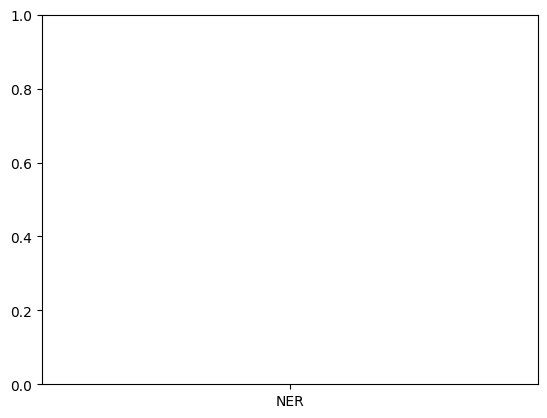

In [6]:
import numpy as np
import spacy
from langdetect import detect
import sys
import time
import matplotlib.pyplot as plt
import random
from collections import Counter
from spacy.training.example import Example
from spacy.scorer import Scorer
from NER import start_model_ner
from CDT import extract_trip_info


input_data = [
"Comment atteindre Rennes depuis marseille",
"Comment atteindre le havre depuis marseille",
"how to go in paris ?",
"Aller de le havre à marseille.",
"Salut ca va ?",
"Comment atteindre paris depuis le havre ?",
"Comment atteindre marseille en partant de le havre le plus rapidement ?",
"Comment atteindre marseille à partir de bordeaux ?",
"Comment me rendre de le havre à paris ?",
"Comment me rendre à marseille  ?",
"Comment puis-je aller à marseille en venant de le havre ?",
"Comment puis-je me rendre de le havre à marseille ?",
"Comment puis-je me rendre à paris le plus rapidement ?",
"Comment puis-je me rendre à marseille en partant de le havre ?",
"Comment puis-je rejoindre paris depuis bordeaux ?",
"Comment puis-je rejoindre marseille ?",
"De le havre vers marseille.",
"De le havre à marseille.",
"how to le havre where paris.",
"Dirigez-vous vers marseille en partant de le havre.",
"Il y a-t-il des trains de le havre à marseille ?",
"Il y a-t-il des trains vers marseille  ?",
"Indique-moi le chemin depuis le havre jusqu'à marseille.",
"Indique-moi le trajet de bordeaux à paris.",
"Salut",
"Indique-moi le trajet le plus simple depuis le havre vers marseille.",
"J'aimerais aller à marseille en partant de le havre.",
"J'aimerais connaître le chemin pour aller.",
"J'aimerais connaître le chemin pour aller à marseille depuis bordeaux.",
"J'aimerais me rendre de le havre à paris.",
"Je cherche le chemin pour aller à marseille.",
"Je cherche un moyen d'aller de le havre à paris.",
"Je cherche à me déplacer de le havre à paris. Comment procéder ?",
"Je cherche à me déplacer depuis le havre. Comment procéder ?",
"Je cherche à me déplacer vers paris depuis bordeaux. Peux-tu m'aider ?",
"Je désire aller de le havre à marseille. Comment faire ?",
"Peux-tu aider ?",
"Je pars de le havre en direction de paris.",
"Je pars de le havre pour aller à marseille.",
"Good Morning.",
"Je prévois un voyage de le havre à paris.",
"Je recherche un itinéraire de le havre à marseille.",
"Je recherche un itinéraire pour aller à marseille.",
"Je souhaite aller de le havre à marseille, s'il te plaît.",
"Je souhaite aller à marseille en partant de le havre. Comment faire ?",
"Comment faire ?",
"Je souhaite me déplacer vers marseille à partir de le havre.",
"Je souhaite me rendre de le havre jusqu'à marseille.",
"Je souhaiterais aller à annecy.",
"Je souhaiterais me déplacer de le havre à marseille, si c'est réalisable.",
"Je suis en train de planifier un déplacement de le havre à marseille.",
"Je vais à annecy.",
"Je vais de le havre vers marseille.",
"Je vais à nice depuis le havre.",
"Hi how are you ?.",
"Je veux aller de le havre à nice.",
"Je veux aller à nice depuis le havre.",
".",
"Je voudrais savoir comment me rendre de le havre à marseille.",
"Je voudrais savoir comment me rendre à rouen depuis le havre, s'il te plaît.",
"Je voudrais savoir.",
"Le voyage de le havre à marseille est ce que je recherche.",
"Mon trajet va de le havre à marseille.",
"Montre-moi le chemin pour aller à rouen .",
"Montre-moi le chemin pour me rendre de lyon à rouen.",
"Montre-moi le chemin pour passer de lyon à grenoble.",
"Montre-moi le trajet pour aller à annecy.",
"Partez pour grenoble en partant de le havre.",
"Peux-tu m'aider à planifier le trajet depuis le havre jusqu'à grenoble ?",
"Peux-tu m'aider à marseille ?",
"Peux-tu m'aider à trouver mon chemin de lyon à marseille ?",
"Peux-tu m'aider à trouver mon chemin vers marseille en partant de grenoble ?",
"Peux-tu me diriger depuis le havre ?",
"Peux-tu me guider de le havre jusqu'à caen ?",
"Peux-tu me guider de le havre vers lyon ?",
"Hi ?",
"Pourrais-tu m'aider à rejoindre annecy depuis le havre ?",
"Pourrais-tu m'indiquer comment aller de le havre à marseille ?",
"Pourrais-tu marseille ?",
"Pourrais-tu me donner les indications pour aller de le havre à caen ?",
"Pourrais-tu me donner les indications pour rejoindre marseille depuis le havre ?",
"Pourrais-tu me guider depuis le havre ?",
"Pourrais-tu me guider vers marseille depuis caen ?",
"Pourriez-vous m'indiquer comment aller de le havre à marseille, je vous prie ?",
"Recherche le chemin annecy.",
"Recherche le chemin le plus court entre caen et marseille.",
"Recherche le trajet le plus court vers grenoble à partir de le havre.",
"Rendez-vous depuis le havre.",
"Serait-il possible de me rendre de le havre à marseille, s'il vous plaît ?",
"Trouve le meilleur itinéraire de le havre à marseille.",
"Trouve un itinéraire à marseille.",
"Trouve un itinéraire pour aller de le havre à marseille.",
"Trouve un itinéraire pour aller à annecy depuis le havre.",
"Trouve un itinéraire pour aller à marseille en .",
"Trouve un moyen d'atteindre marseille depuis le havre.",
"Trouve-moi le chemin de le havre à marseille.",
"Trouve-moi un itinéraire de marseille.",
"Trouve-moi un itinéraire pour aller de le havre à caen.",
"Trouve-moi un moyen de transport de le havre jusqu'à marseille.",
"Trouve-moi un moyen de transport.",
"Trouver un moyen d'atteindre caen depuis le havre est mon objectif.",
"Y a-t-il un moyen d'aller de le havre à marseille ?",
"Y a-t-il un moyen d'atteindre ?",
]

## 22 NO TRIP
## 47 OK
true_labels = [
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
    "NO_TRIP",
    "OK",
    "OK",
]



def timer(func, *args, **kwargs):
    start_time = time.time()
    result = func(*args, **kwargs)
    end_time = time.time()
    return result, end_time - start_time

def calculate_precision(predicted_results, true_labels):
    true_positives = sum(1 for predicted, true in zip(predicted_results, true_labels) if predicted == true)
    precision = true_positives / len(predicted_results) if predicted_results else 0
    return precision

def exec_benchmark(input_data):
    ner_times = []
    cdt_times = []
    cdt_results = []
    ner_results = []

    for sentence in input_data:
        ner_result, ner_time = timer(start_model_ner, sentence)
        ner_times.append(ner_time)
        ner_results.append(ner_result)

        cdt_result, cdt_time = timer(extract_trip_info, sentence)
        cdt_times.append(cdt_time)
        cdt_results.append(cdt_result)


    total_ner_time = sum(ner_times)
    total_cdt_time = sum(cdt_times)
    ner_precision = calculate_precision(ner_results, true_labels)  
    cdt_precision = calculate_precision(cdt_results, true_labels)  

    return ner_times, cdt_times, total_ner_time, total_cdt_time, ner_precision, cdt_precision

def graph(ner_times, cdt_times):
    np.random.seed(0)
    sample_indices = np.arange(1, 101)  # 100 samples
    ner_times = np.random.gamma(shape=2., scale=1., size=100)
    cdt_times = np.random.gamma(shape=2., scale=0.5, size=100)
    
    plt.figure(figsize=(14, 7))
    plt.plot(sample_indices, ner_times, label='NER Execution Time', color='blue')
    plt.plot(sample_indices, cdt_times, label='CDT Execution Time', color='red')
    
    total_ner_time = np.sum(ner_times)
    total_cdt_time = np.sum(cdt_times)
    plt.text(50, 5, f'Total NER Time: {total_ner_time:.2f}s', horizontalalignment='center', color='blue')
    plt.text(50, 4.5, f'Total CDT Time: {total_cdt_time:.2f}s', horizontalalignment='center', color='orange')
    
    num_sentences = len(sample_indices)
    plt.text(50, 4, f'Number of Sentences: {num_sentences}', horizontalalignment='center')
    
    plt.xlabel('Sample Index')
    plt.ylabel('Time (seconds)')
    plt.title('Execution Time per Sample')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_precision(ner_precision, cdt_precision):
    labels = ['NER', 'CDT']
    precisions = [ner_precision, cdt_precision]
    
    plt.bar(labels, precisions, color=['blue', 'orange'])
    plt.ylim(0, 1) 
    plt.ylabel('Precision')
    plt.title('Precision of NER and CDT Scripts')
    plt.show()

ner_precision, cdt_precision, ner_times, cdt_times, total_ner_time, total_cdt_time = exec_benchmark(input_data)

print(f"Total NER Time: {total_ner_time} seconds")
print(f"Total CDT Time: {total_cdt_time} seconds")

graph(ner_times, cdt_times)

print(f"Total NER Precision: {ner_precision}")
print(f"Total CDT Precision: {cdt_precision}")

plot_precision(ner_precision, cdt_precision)